# Customer Segmentation Project


## 1) Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


## 2) Reading Data

In [48]:
# https://www.kaggle.com/datasets/vetrirah/customer?select=Train.csv
Train_Data = pd.read_csv('Train.csv')

Train_Data.shape

(8068, 11)

In [50]:
Train_Data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [52]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## 3) Data Preprocessing

In [54]:
Train_Data.drop('Segmentation', axis=1, inplace=True)
Train_Data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [56]:
Train_Data.drop('ID', axis=1, inplace=True)
Train_Data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


### </> Finding Nulls

In [58]:
Train_Data.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

### </> Dealing With Nulls

In [60]:
# The columns with Nan is ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']

CleanColWithMODE = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']

for col in CleanColWithMODE:
    mode_value = Train_Data[col].mode()[0]
    Train_Data[col].fillna(mode_value, inplace=True)

In [62]:
CleanColWithMEAN = ['Work_Experience', 'Family_Size']

for col in CleanColWithMEAN:
     mean_value = Train_Data[col].mean()
     Train_Data[col].fillna(mean_value, inplace=True)

In [64]:
Train_Data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### </> Convert Categorical Data

In [66]:
# Convert The Text into numbres:

labelEncoder = LabelEncoder()

for col in Train_Data.select_dtypes(include=['object']).columns:
    Train_Data[col] = labelEncoder.fit_transform(Train_Data[col])

Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int32  
 1   Ever_Married     8068 non-null   int32  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int32  
 4   Profession       8068 non-null   int32  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int32  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 378.3 KB


In [69]:
Train_Data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.000000,2,4.0,3
1,0,1,38,1,2,2.641663,0,3.0,3
2,0,1,67,1,2,1.000000,2,1.0,5
3,1,1,67,1,7,0.000000,1,2.0,5
4,0,1,40,1,3,2.641663,1,6.0,5


### </> Normalization (MinMaxScaler)

In [72]:
scaler = MinMaxScaler()

Train_Data_Normalized = pd.DataFrame(scaler.fit_transform(Train_Data), columns=Train_Data.columns)

Train_Data_Normalized.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,0.0,0.056338,0.0,0.625,0.071429,1.0,0.375,0.500000
1,0.0,1.0,0.281690,1.0,0.250,0.188690,0.0,0.250,0.500000
2,0.0,1.0,0.690141,1.0,0.250,0.071429,1.0,0.000,0.833333
3,1.0,1.0,0.690141,1.0,0.875,0.000000,0.5,0.125,0.833333
4,0.0,1.0,0.309859,1.0,0.375,0.188690,0.5,0.625,0.833333


### </> Finding Outliers 

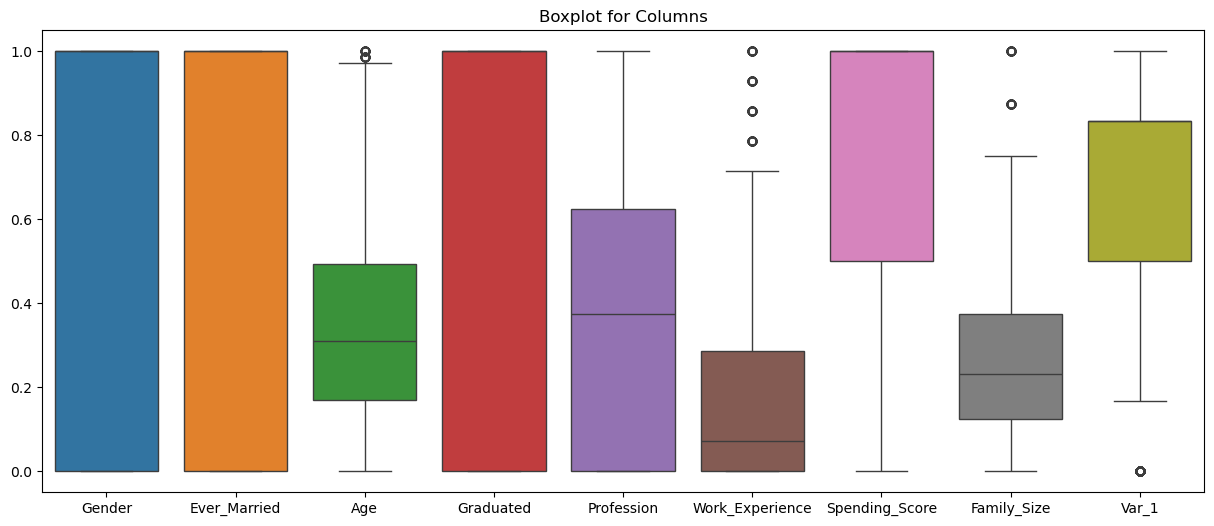

In [79]:
plt.figure(figsize=(15, 6))  
sns.boxplot(data=Train_Data_Normalized)
plt.title("Boxplot for Columns")
plt.show()

In [92]:
# Z-sorce for finding outlires
z_scores = np.abs(zscore(Train_Data_Normalized))

outliers = (z_scores > 3)

outlier_counts = outliers.sum(axis=0)

for col, count in zip(Train_Data_Normalized.columns, outlier_counts):
    print(f"{col}: {count} outliers")

Gender: 0 outliers
Ever_Married: 0 outliers
Age: 0 outliers
Graduated: 0 outliers
Profession: 0 outliers
Work_Experience: 91 outliers
Spending_Score: 0 outliers
Family_Size: 94 outliers
Var_1: 0 outliers


In [94]:
# Normaliz The Columns to Use
Columns_To_Use = ["Age", "Graduated", "Profession", "Work_Experience", "Spending_Score"]

NormalizedFor_Columns_To_Use = Train_Data[Columns_To_Use].copy()

scaler = MinMaxScaler()

NormalizedFor_Columns_To_Use = pd.DataFrame(scaler.fit_transform(NormalizedFor_Columns_To_Use), columns=Columns_To_Use)

NormalizedFor_Columns_To_Use.head()

,Age,Graduated,Profession,Work_Experience,Spending_Score
0,0.056338,0.0,0.625,0.071429,1.0
1,0.281690,1.0,0.250,0.188690,0.0
2,0.690141,1.0,0.250,0.071429,1.0
3,0.690141,1.0,0.875,0.000000,0.5
4,0.309859,1.0,0.375,0.188690,0.5


### </> Elbow Method and Silhouette Score

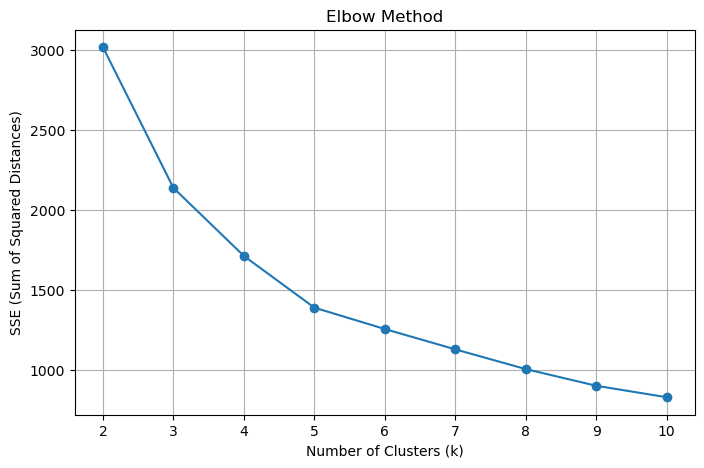

In [97]:

sse = []
silhouette_scores = []
k_range = range(2, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=12, max_iter=500)
    kmeans.fit(NormalizedFor_Columns_To_Use)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(NormalizedFor_Columns_To_Use, kmeans.labels_))

# Elbow Method 
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


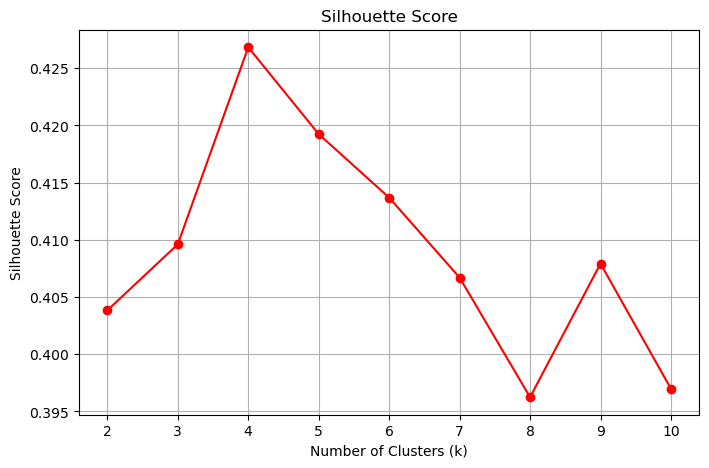

The best number of clusters according to Silhouette Score is: 4


In [99]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters according to Silhouette Score is: {best_k}")

## 4) Bulid and Train Model (Kmeans)

In [101]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=500)
kmeans.fit(NormalizedFor_Columns_To_Use)

NormalizedFor_Columns_To_Use = pd.DataFrame(NormalizedFor_Columns_To_Use)

NormalizedFor_Columns_To_Use['Cluster'] = kmeans.labels_

NormalizedFor_Columns_To_Use.head()

,Age,Graduated,Profession,Work_Experience,Spending_Score,Cluster
0,0.056338,0.0,0.625,0.071429,1.0,2
1,0.281690,1.0,0.250,0.188690,0.0,3
2,0.690141,1.0,0.250,0.071429,1.0,0
3,0.690141,1.0,0.875,0.000000,0.5,1
4,0.309859,1.0,0.375,0.188690,0.5,1


In [103]:
NormalizedFor_Columns_To_Use.head()

,Age,Graduated,Profession,Work_Experience,Spending_Score,Cluster
0,0.056338,0.0,0.625,0.071429,1.0,2
1,0.281690,1.0,0.250,0.188690,0.0,3
2,0.690141,1.0,0.250,0.071429,1.0,0
3,0.690141,1.0,0.875,0.000000,0.5,1
4,0.309859,1.0,0.375,0.188690,0.5,1


## 4) Visualization
  #### PCA

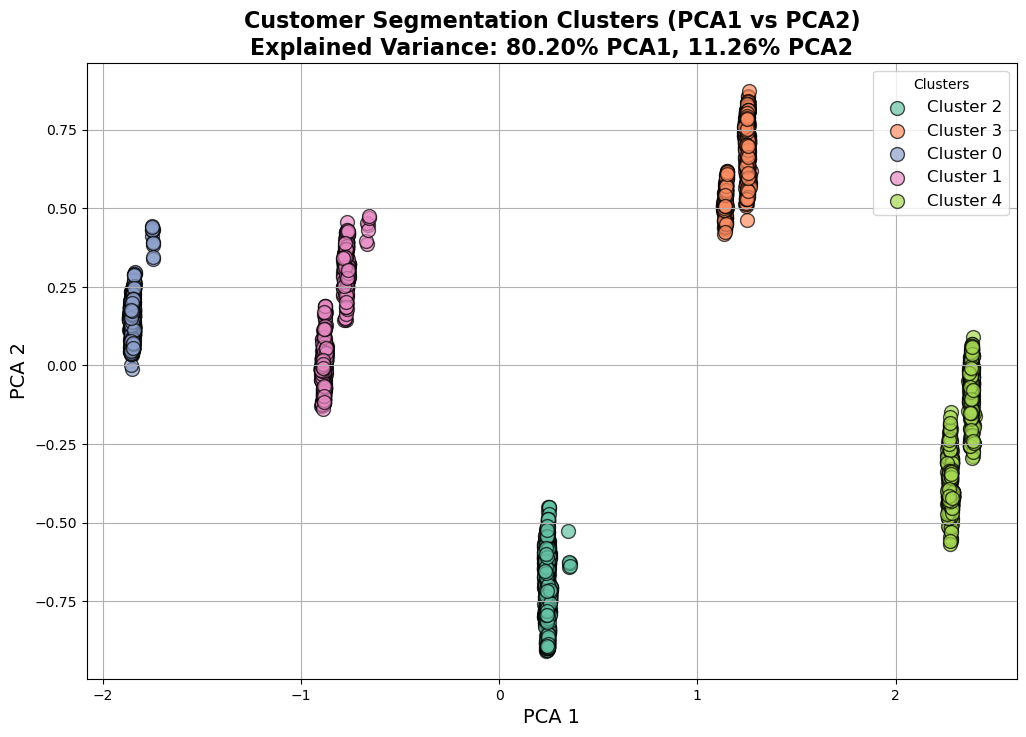

In [105]:

NormalizedFor_Columns_To_Use.columns = NormalizedFor_Columns_To_Use.columns.astype(str)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(NormalizedFor_Columns_To_Use)  

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = NormalizedFor_Columns_To_Use['Cluster']  

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 8))

palette = sns.color_palette("Set2", n_colors=len(pca_df['Cluster'].unique()))  

for i, cluster in enumerate(pca_df['Cluster'].unique()):
    clustered = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered['PCA1'], clustered['PCA2'], label=f'Cluster {cluster}', color=palette[i], s=100, edgecolors='black', alpha=0.7)

plt.title(f'Customer Segmentation Clusters (PCA1 vs PCA2)\nExplained Variance: {explained_variance[0]*100:.2f}% PCA1, {explained_variance[1]*100:.2f}% PCA2', fontsize=16, weight='bold')
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)
plt.legend(title='Clusters', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()


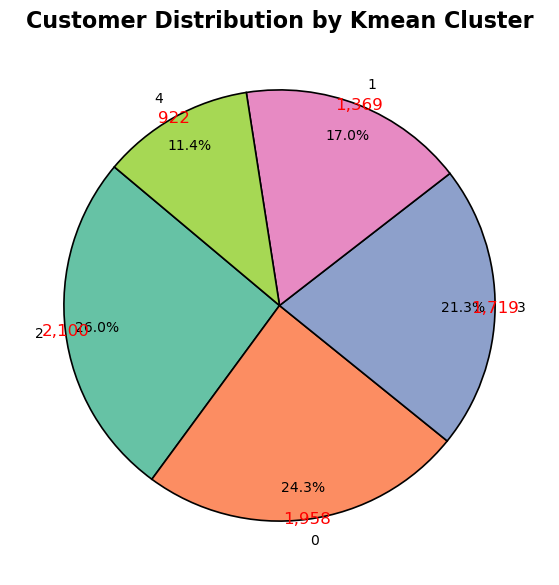

In [107]:
palette = sns.color_palette("Set2", n_colors=len(NormalizedFor_Columns_To_Use['Cluster'].value_counts()))

plt.figure(figsize=(15, 7))
ax = NormalizedFor_Columns_To_Use['Cluster'].value_counts().plot(kind='pie',
                                                autopct='%1.1f%%',
                                                startangle=140,
                                                colors=palette,
                                                wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
                                                pctdistance=0.85)

plt.title('Customer Distribution by Kmean Cluster', fontsize=16, weight='bold')

plt.ylabel('')

for i, p in enumerate(ax.patches):
    angle = (p.theta2 - p.theta1) / 2. + p.theta1
    angle_rad = np.deg2rad(angle)  

    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    percentage = f'{NormalizedFor_Columns_To_Use["Cluster"].value_counts().values[i]:,.0f}'  
    ax.text(x, y, percentage, ha='center', va='center', fontsize=12, color='red')

plt.show()


In [109]:
cluster_summary = NormalizedFor_Columns_To_Use.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,Age,Graduated,Profession,Work_Experience,Spending_Score
Cluster,,,,,
0,0.338352,1.0,0.110253,0.219123,0.996936
1,0.453780,1.0,0.705168,0.190599,0.803506
2,0.211234,0.0,0.484583,0.183062,0.998571
3,0.432171,1.0,0.115838,0.168559,0.074171
4,0.459534,0.0,0.403742,0.171580,0.227223


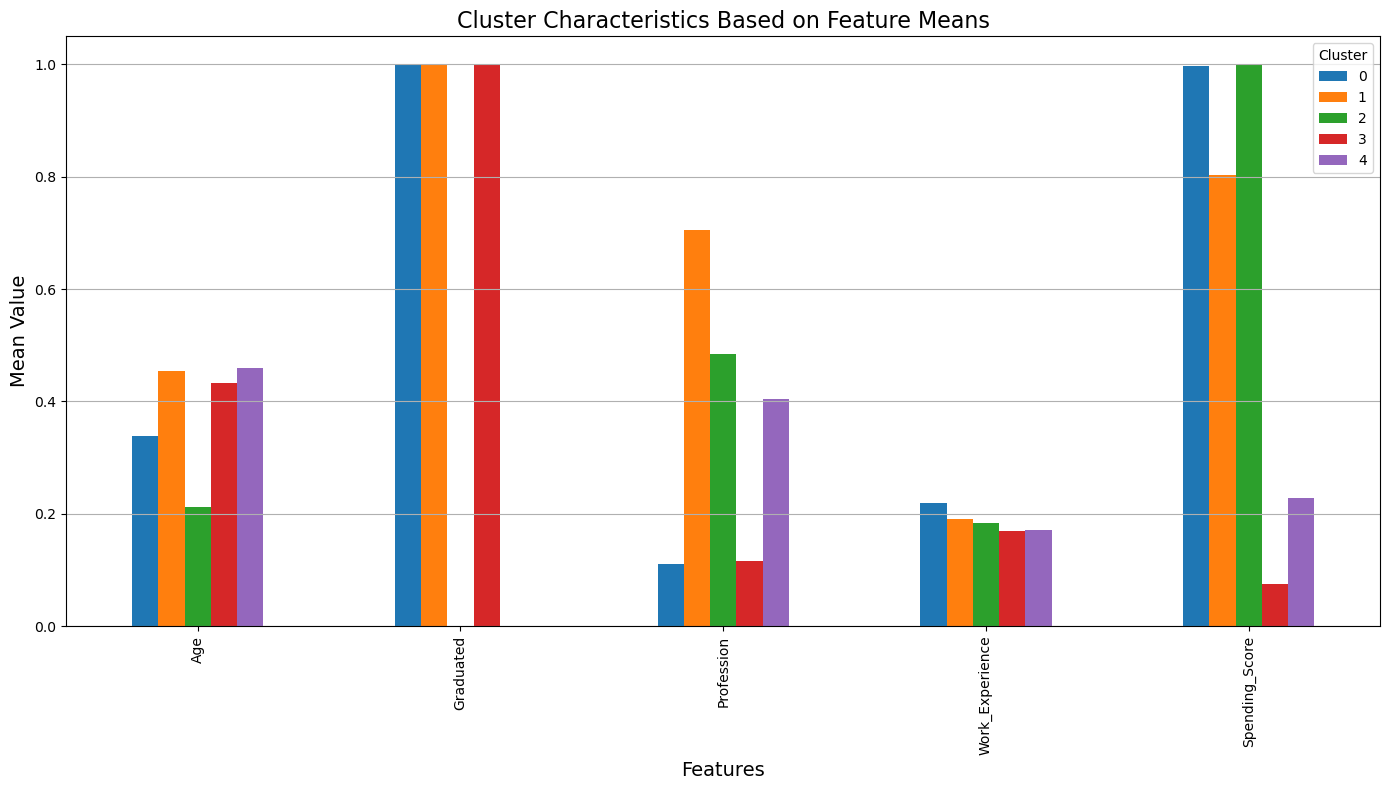

In [111]:
cluster_summary = NormalizedFor_Columns_To_Use.groupby('Cluster').mean(numeric_only=True)

cluster_summary.T.plot(kind='bar', figsize=(14, 8))

plt.title('Cluster Characteristics Based on Feature Means', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

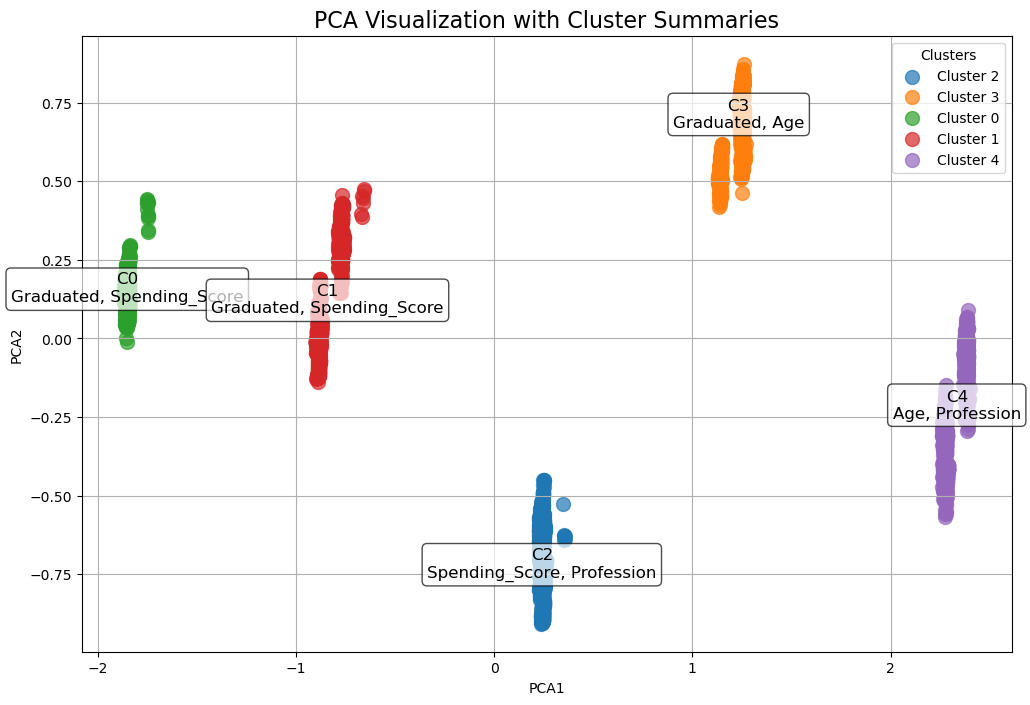

In [113]:
plt.figure(figsize=(12, 8))

for i, cluster in enumerate(pca_df['Cluster'].unique()):
    clustered = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered['PCA1'], clustered['PCA2'],
                label=f'Cluster {cluster}', s=100, alpha=0.7)

    center_x = clustered['PCA1'].mean()
    center_y = clustered['PCA2'].mean()
    plt.text(center_x, center_y, f"C{cluster}\n{', '.join(cluster_summary.columns[np.argsort(-cluster_summary.loc[cluster].values)[:2]])}",
             fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

plt.title("PCA Visualization with Cluster Summaries", fontsize=16)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

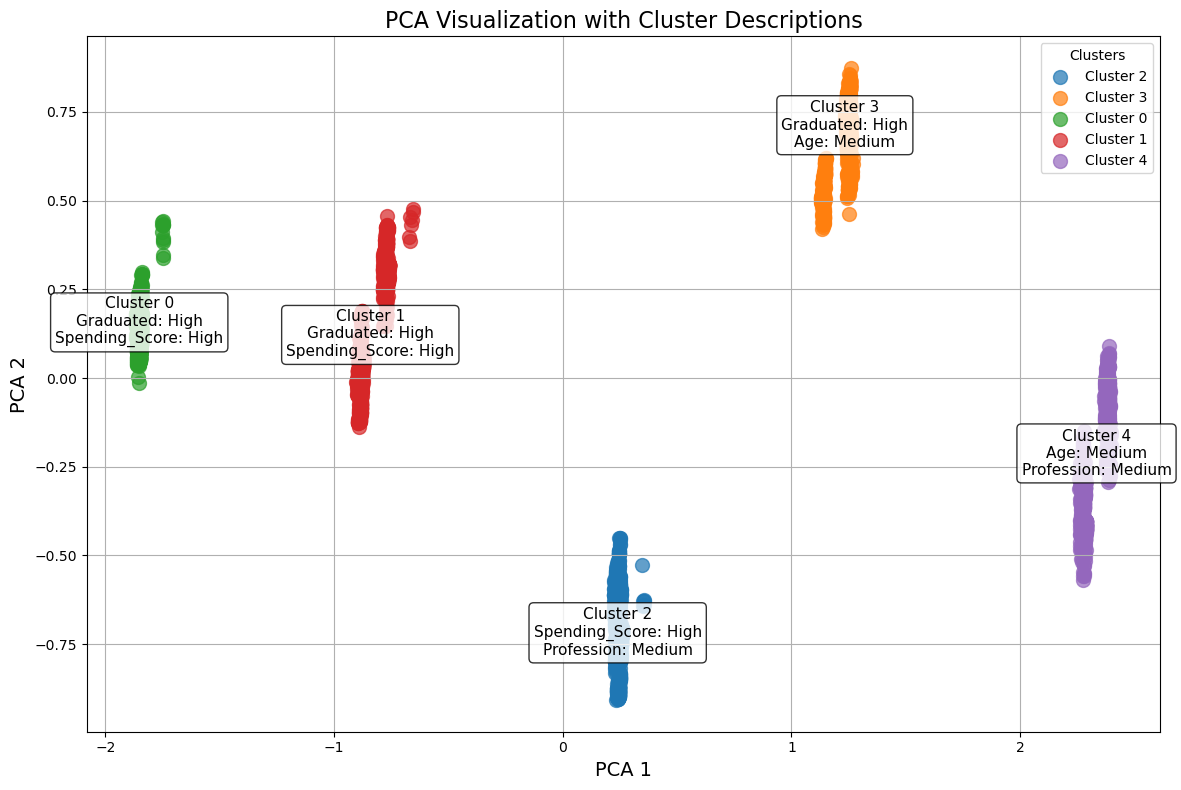

In [115]:

plt.figure(figsize=(12, 8))

# description function
def describe_value(feature_name, value):
    if value >= 0.7:
        level = "High"
    elif value >= 0.4:
        level = "Medium"
    else:
        level = "Low"
    return f"{feature_name}: {level}"

# Plotting PCA with descriptions
for cluster in pca_df['Cluster'].unique():
    clustered = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered['PCA1'], clustered['PCA2'],
                label=f'Cluster {cluster}', s=100, alpha=0.7)

    # Cluster center
    center_x = clustered['PCA1'].mean()
    center_y = clustered['PCA2'].mean()

    # Top 2 features
    cluster_means = cluster_summary.loc[cluster]
    top_features_idx = np.argsort(-cluster_means.values)[:2]
    top_features = cluster_means.index[top_features_idx]
    top_values = cluster_means.values[top_features_idx]

    # Build description
    descriptions = [describe_value(f, v) for f, v in zip(top_features, top_values)]
    description_text = "\n".join(descriptions)

    # Add text in the center of the cluster
    plt.text(center_x, center_y, f"Cluster {cluster}\n{description_text}",
             fontsize=11, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Plot styling
plt.title("PCA Visualization with Cluster Descriptions", fontsize=16)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)
plt.grid(True)
plt.legend(title="Clusters")
plt.tight_layout()
plt.show()

In [117]:
score = silhouette_score(NormalizedFor_Columns_To_Use, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6417729151198531


## Bulid DBSCAN With Best Prameiters

In [119]:
eps_values = np.arange(0.3, 1.1, 0.1)  
min_samples_values = range(5, 15)  

best_score = -1
best_eps = 0
best_min_samples = 0

# DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = dbscan.fit_predict(NormalizedFor_Columns_To_Use)

        if len(set(db_labels)) > 1:
            score = silhouette_score(NormalizedFor_Columns_To_Use, db_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score he: {best_score:.2f} with eps = {best_eps} and min_samples = {best_min_samples}")


Best Silhouette Score he: 0.64 with eps = 0.6000000000000001 and min_samples = 5


## Train DBSCAN Model

In [121]:

dbscan = DBSCAN(eps=1.0000000000000002, min_samples=5) 
db_labels = dbscan.fit_predict(NormalizedFor_Columns_To_Use)

if len(set(db_labels)) > 1:
    silhouette = silhouette_score(NormalizedFor_Columns_To_Use, db_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette:.2f}")
else:
    print("DBSCAN: Not found a lot of this Cluster!")

NormalizedFor_Columns_To_Use['Cluster_DBSCAN'] = db_labels

Silhouette Score for DBSCAN: 0.64


In [128]:
unique_clusters = set(db_labels)
print(f"Number of clusters (excluding noise): {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print(f"Number of noise points: {(db_labels == -1).sum()}")

Number of clusters (excluding noise): 5
Number of noise points: 0


In [130]:
cluster_counts = pd.Series(db_labels).value_counts().sort_index()
print("Points per cluster:")
cluster_counts

Points per cluster:


0    2100
1    1719
2    1958
3    1369
4     922
Name: count, dtype: int64

In [146]:
NormalizedFor_Columns_To_Use

,Age,Graduated,Profession,Work_Experience,Spending_Score,Cluster,Cluster_DBSCAN
0,0.056338,0.0,0.625,0.071429,1.0,2,0
1,0.281690,1.0,0.250,0.188690,0.0,3,1
2,0.690141,1.0,0.250,0.071429,1.0,0,2
3,0.690141,1.0,0.875,0.000000,0.5,1,3
4,0.309859,1.0,0.375,0.188690,0.5,1,3
...,...,...,...,...,...,...,...
8063,0.056338,0.0,0.000,0.000000,1.0,2,0
8064,0.239437,0.0,0.500,0.214286,1.0,2,0
8065,0.211268,1.0,0.625,0.071429,1.0,1,3
8066,0.126761,1.0,0.625,0.071429,1.0,1,3


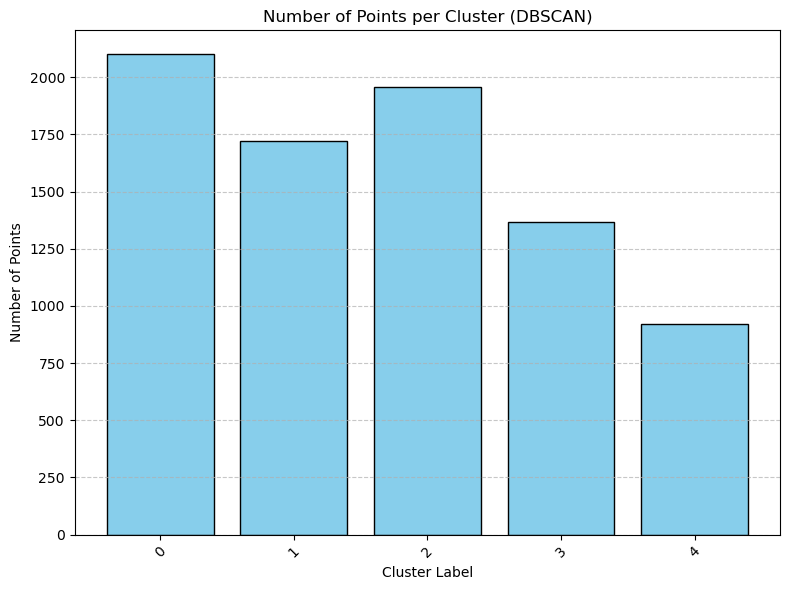

In [132]:

cluster_counts = pd.Series(db_labels).value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='skyblue', edgecolor='black')
plt.title("Number of Points per Cluster (DBSCAN)")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


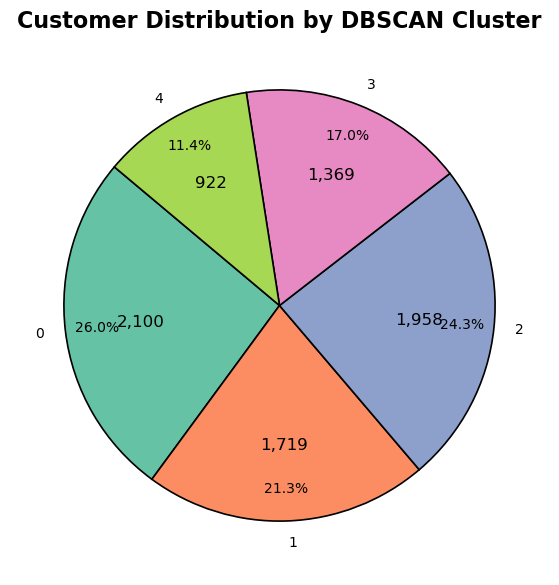

In [138]:
cluster_col = 'Cluster_DBSCAN'

cluster_counts = NormalizedFor_Columns_To_Use[cluster_col].value_counts().sort_index()
palette = sns.color_palette("Set2", n_colors=len(cluster_counts))

plt.figure(figsize=(15, 7))
ax = cluster_counts.plot(kind='pie',
                         autopct='%1.1f%%',
                         startangle=140,
                         colors=palette,
                         wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
                         pctdistance=0.85)

plt.title('Customer Distribution by DBSCAN Cluster', fontsize=16, weight='bold')
plt.ylabel('')

for i, p in enumerate(ax.patches):
    angle = (p.theta2 - p.theta1) / 2. + p.theta1
    angle_rad = np.deg2rad(angle)
    
    x = np.cos(angle_rad) * 0.65  
    y = np.sin(angle_rad) * 0.65
    
    count_label = f'{cluster_counts.values[i]:,}'  
    ax.text(x, y, count_label, ha='center', va='center', fontsize=12, color='black')

plt.show()
